In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
hc_df = pd.read_csv("H_C.txt", sep="\t", header=None, names=["Herb", "Component","Association"])

In [3]:
B = nx.Graph()

# Add nodes with bipartite labels
herbs = hc_df["Herb"].unique()
components = hc_df["Component"].unique()

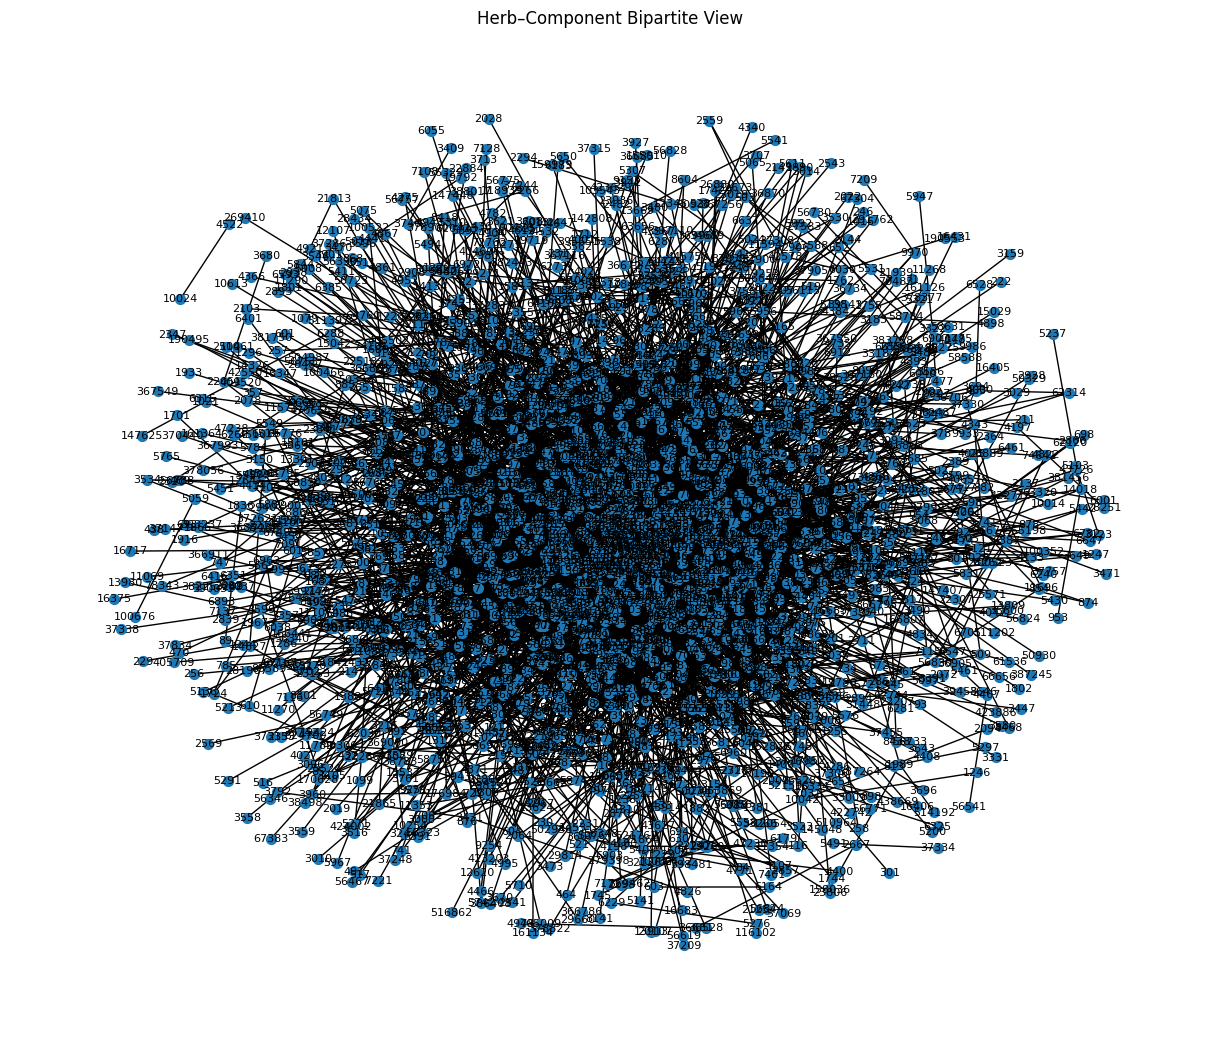

<Figure size 640x480 with 0 Axes>

In [4]:
B.add_nodes_from(herbs, bipartite=0)       # Herbs
B.add_nodes_from(components, bipartite=1)  # Components

# Add edges between herbs and components
edges = [(row["Herb"], row["Component"]) for _, row in hc_df.iterrows()]
B.add_edges_from(edges)

# Draw bipartite graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(B, k=0.15)  # force-directed layout
nx.draw(B, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Herb–Component Bipartite View")
plt.show()
plt.savefig("fig1.png")

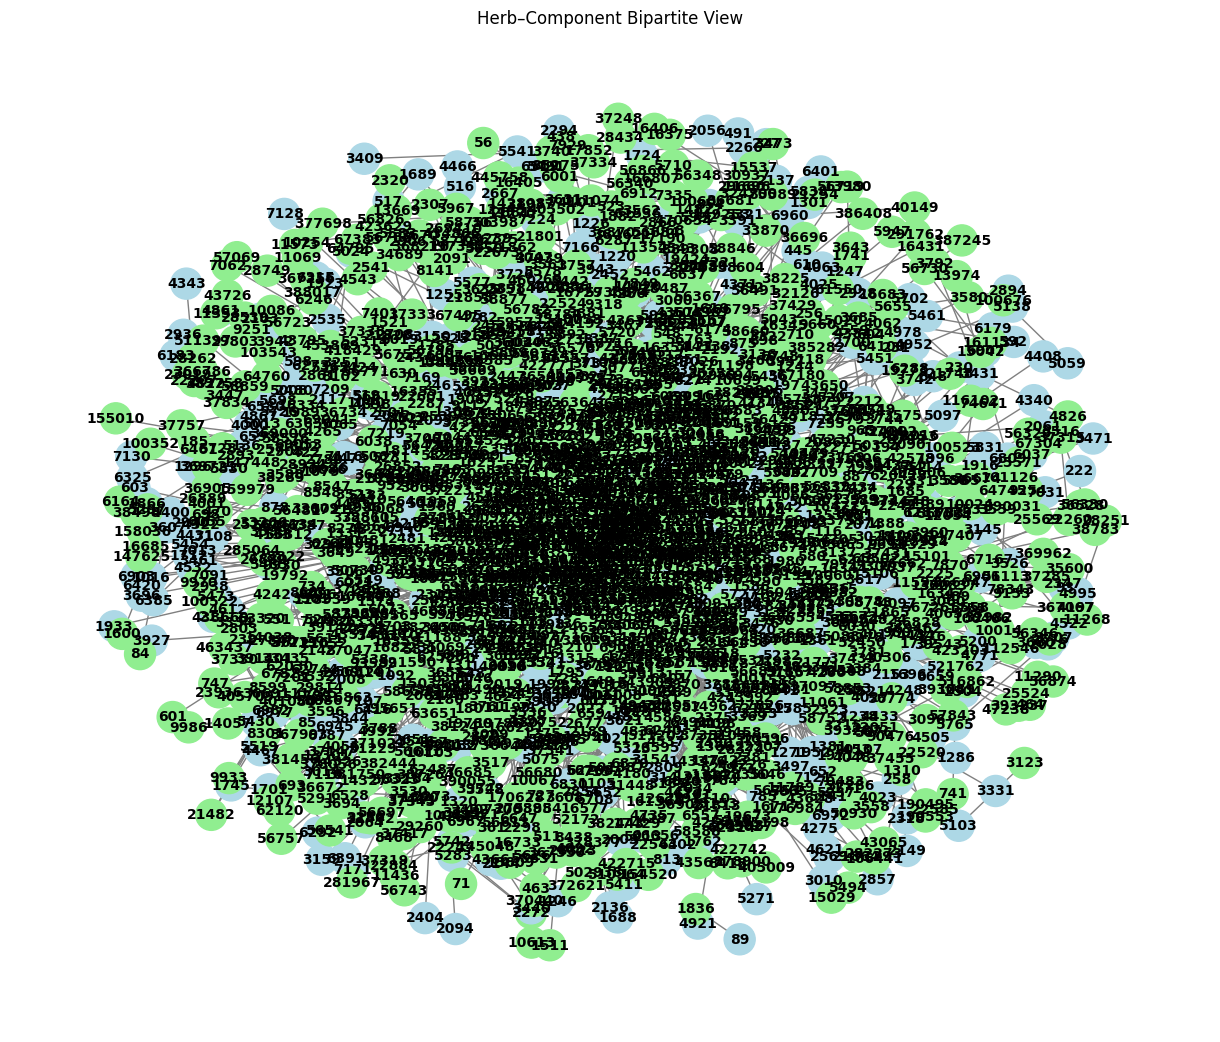

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(B, k=0.15)  # force-directed layout

# Define the color for nodes based on bipartite group
node_colors = ['lightblue' if B.nodes[node]['bipartite'] == 0 else 'lightgreen' for node in B.nodes()]

# Draw the graph
nx.draw(B, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=10, font_weight="bold", edge_color="gray")

# Title of the plot
plt.title("Herb–Component Bipartite View")
plt.show()
plt.savefig("fig2.png")

In [6]:
cp_df = pd.read_csv("C_P.txt", sep="\t", header=None, names=["Component", "TargetProtein"])
pd_df = pd.read_csv("P_D.txt", sep="\t", header=None, names=["Protein", "Disease", "Association"])

In [7]:
proteins = sorted(pd_df["Protein"].unique())
diseases = sorted(pd_df["Disease"].unique())

In [8]:
B_td = nx.Graph()

In [9]:
# Add proteins and diseases as nodes to the bipartite graph
B_td.add_nodes_from(proteins, bipartite=0)  # Proteins are set 0
B_td.add_nodes_from(diseases, bipartite=1)  # Diseases are set 1


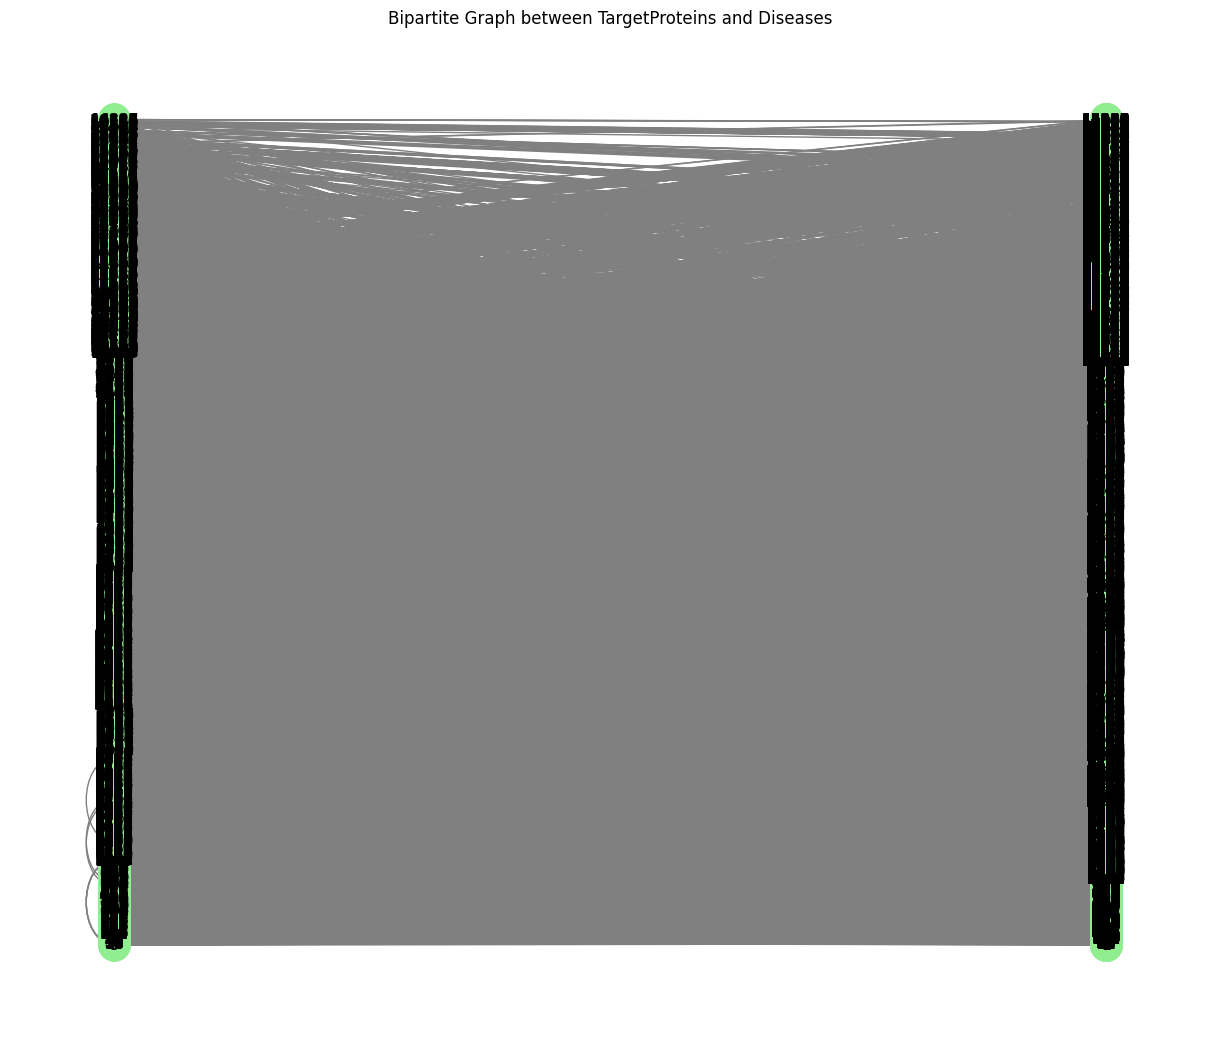

In [10]:
# Step 2: Add edges between proteins and diseases
edges_td = [(row["Protein"], row["Disease"]) for _, row in pd_df.iterrows()]
B_td.add_edges_from(edges_td)

# Step 3: Draw the bipartite graph for target-protein and disease relationships
plt.figure(figsize=(12, 10))

# Generate positions for the nodes using bipartite layout
pos_td = nx.bipartite_layout(B_td, proteins)  # proteins are placed on one side and diseases on the other

# Draw the graph
nx.draw(B_td, pos_td, with_labels=True, node_size=500, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="gray")

# Add a title
plt.title("Bipartite Graph between TargetProteins and Diseases")

# Show the plot
plt.show()

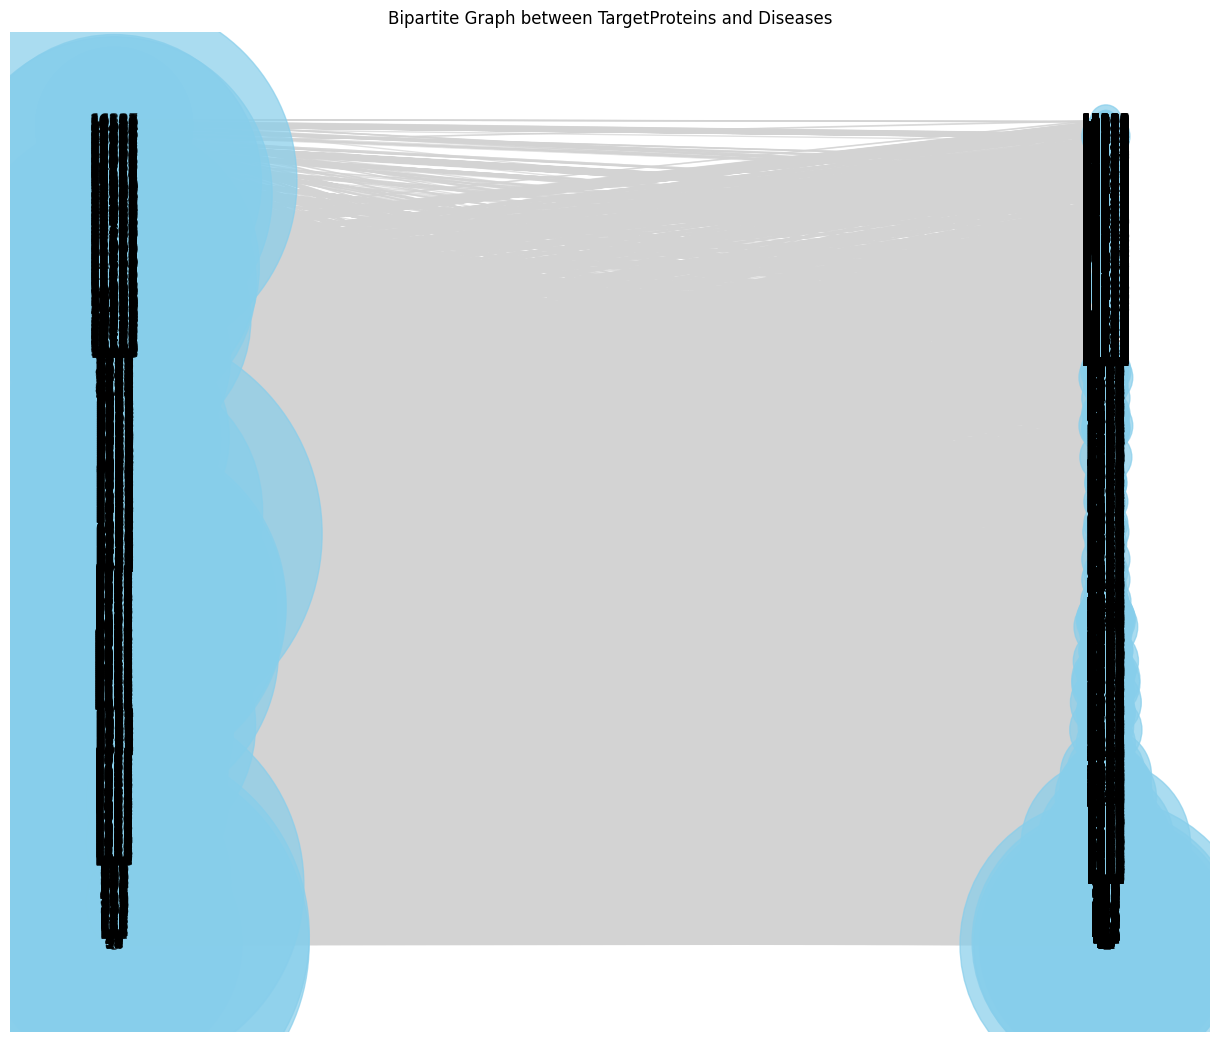

In [11]:
# Step 3: Draw the bipartite graph for target-protein and disease relationships
plt.figure(figsize=(12, 10))

# Generate positions for the nodes using bipartite layout
pos_td = nx.bipartite_layout(B_td, proteins)  # proteins are placed on one side and diseases on the other

# Customizing Node Sizes (based on degree)
node_sizes = [B_td.degree(node) * 100 for node in B_td.nodes()]

# Draw the graph with custom node sizes and edge transparency
nx.draw(B_td, pos_td, with_labels=True, node_size=node_sizes, node_color="skyblue", font_size=10, font_weight="bold", edge_color="lightgray", alpha=0.7)

# Add a title
plt.title("Bipartite Graph between TargetProteins and Diseases")

# Show the plot
plt.show()

In [ ]:
G_td = nx.Graph()

# Add proteins and diseases as nodes to the graph
G_td.add_nodes_from(proteins, bipartite=0)  # Proteins are set 0
G_td.add_nodes_from(diseases, bipartite=1)  # Diseases are set 1

# Step 2: Add edges between proteins and diseases
edges_td = [(row["Protein"], row["Disease"]) for _, row in pd_df.iterrows()]
G_td.add_edges_from(edges_td)
plt.figure(figsize=(12, 10))

# Generate positions for the nodes using the spring layout
pos_td = nx.spring_layout(G_td, seed=42)  # The seed ensures reproducible layout

# Customizing Node Sizes (based on degree)
node_sizes = [G_td.degree(node) * 100 for node in G_td.nodes()]

# Draw the graph with custom node sizes and edge transparency
nx.draw(G_td, pos_td, with_labels=True, node_size=node_sizes, node_color="skyblue", font_size=10, font_weight="bold", edge_color="lightgray", alpha=0.7)

# Add a title
plt.title("Graph between TargetProteins and Diseases (Spring Layout)")

# Show the plot
plt.show()